### Author: Yasir Abdurrahman

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('dataset1/train1.csv')

## Dataset
### Description
Dataset berikut merupakan data demografi 1556 nasabah bank pada kuarter ke-4 tahun 2017, data ini kemudian dibagi menjadi data train dan test. Variabel target pada data ini adalah `not_paid`, variabel biner yang menjadi indikasi suatu loan/ pinjaman lunas (berhasil dilunasi pembayarannya) atau tidak. Suatu pinjaman dikatakan not_paid (not paid = 1) jika terjadi default (gagal bayar), Charged Off, atau lewat batas akhir pembayaran (Grace Period).

### Variables Glossary
- <code>initial_list_status</code>: indikasi loan termasuk ke dalam kategori <code>w</code> (whole) atau <code>f</code> (fractional).
- <code>purpose</code>: tujuan peminjaman (loan) terbagi atas 5 kategori yaitu untuk credit_card, debt_consolidation, home_improvement, major_purchase, dan small_bussiness
- <code>int_rate</code>: interest rate(suku bunga) dalam prosentase
- <code>installment</code>: banyaknya installment/uang bulanan yang dibayarkan peminjam
- <code>annual_inc</code>: income/pemasukan tahunan peminjam sesuai yang tertulis saat proses pengajuan pinjaman
- <code>dti</code>: rasio antara pinjaman bulanan yang wajib dibayarkan peminjam dengan gaji/pemasukan peminjam sesuai report
- <code>verification_status</code>: status verifikasi report pemasukan/gaji peminjam, terbagi atas kategori income_verified, not verified, atau source was verified
- <code>grade</code>: grade load berdasarkan software
- <code>revol_bal</code>: total kredit dalam revolving balance (pinjaman yang tidak terbayarkan)
- <code>inq_last_12m</code>: banyaknya kredit/pinjaman pada akhir bulan 12
- <code>delinq_2yrs</code>: banyaknya hari telat bayar untuk kriteria 30+ pada history peminjam selama 2 tahun terakhir
- <code>home_ownership</code>: kategori kepemilikan rumah peminjam meliputi MORTGAGE, OWN, atau RENT
- <code>log_inc</code>: log dari annual_inc
- <code>verified</code>: 0 untuk <code>not_verified</code> masih dibawah status verifikasi, 1 lainnya
- <code>grdCtoA</code>: 1 untuk grade kredit A, B atau C; 0 untuk grade load lainnya
- <code><b>not_paid</b></code>: 1 jika gagal bayar _charge off/grace period_, 0 lainnya (TARGET)

In [3]:
df_train.head()

,Unnamed: 0,initial_list_status,purpose,int_rate,installment,annual_inc,dti,verification_status,grade,revol_bal,inq_last_12m,delinq_2yrs,home_ownership,not_paid,log_inc,verified,grdCtoA
0,1495,w,debt_consolidation,21.45,955.75,90000.0,20.91,Verified,D,23448,4,0,MORTGAGE,1,11.407565,1,0
1,266,w,debt_consolidation,18.06,289.47,65000.0,12.74,Source Verified,D,13362,2,0,MORTGAGE,1,11.082143,1,0
2,309,w,home_improvement,9.44,838.91,97400.0,12.64,Source Verified,B,2372,1,0,MORTGAGE,1,11.486581,1,1
3,239,w,home_improvement,10.42,214.55,60000.0,2.38,Not Verified,B,4705,2,0,OWN,0,11.002100,0,1
4,136,f,debt_consolidation,11.99,1024.52,150000.0,20.84,Not Verified,B,14342,0,0,MORTGAGE,0,11.918391,0,1


# Explore Dataset

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 17 columns):
Unnamed: 0             1244 non-null int64
initial_list_status    1244 non-null object
purpose                1244 non-null object
int_rate               1244 non-null float64
installment            1244 non-null float64
annual_inc             1244 non-null float64
dti                    1244 non-null float64
verification_status    1244 non-null object
grade                  1244 non-null object
revol_bal              1244 non-null int64
inq_last_12m           1244 non-null int64
delinq_2yrs            1244 non-null int64
home_ownership         1244 non-null object
not_paid               1244 non-null int64
log_inc                1244 non-null float64
verified               1244 non-null int64
grdCtoA                1244 non-null int64
dtypes: float64(5), int64(7), object(5)
memory usage: 165.3+ KB


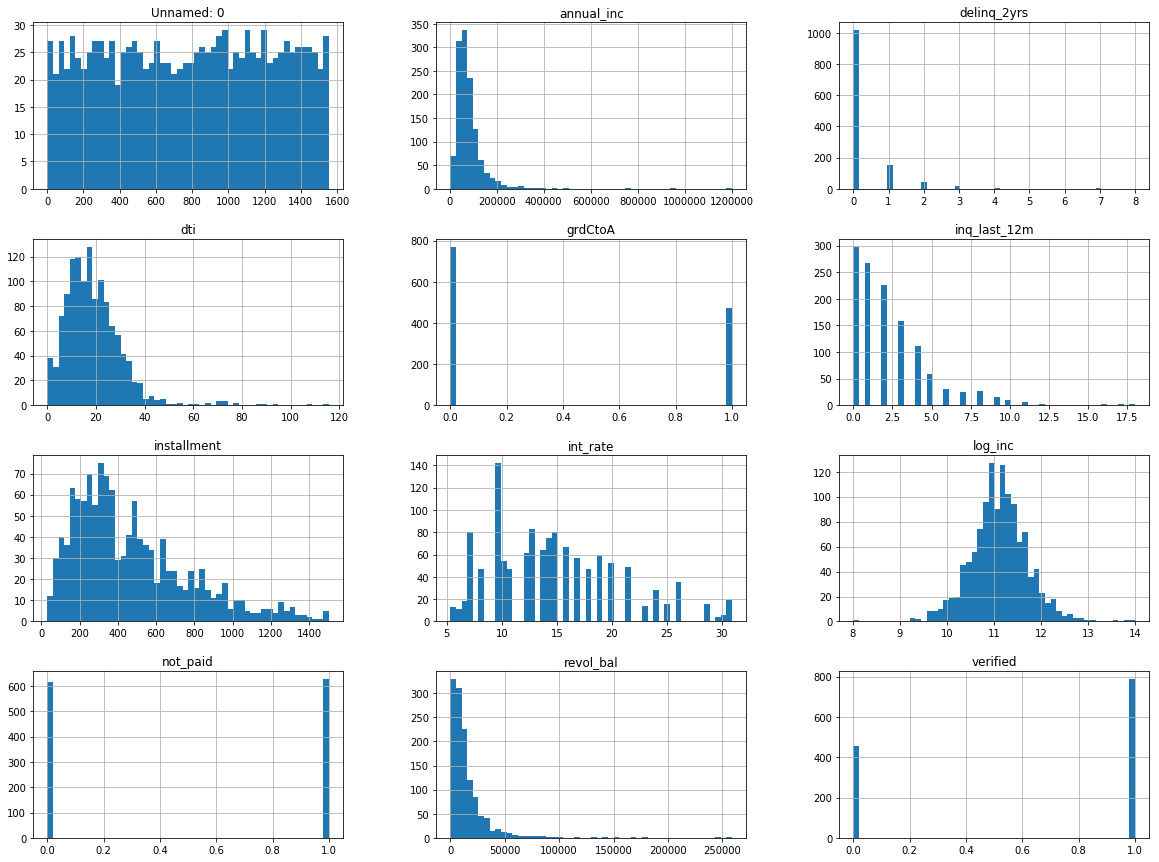

In [5]:
%matplotlib inline
df_train.hist(bins=50, figsize=(20,15))
plt.show()

## Question 1: 
Bagaimana anda mendeskripsikan hubungan antara `annual_inc` dan `revol_bal`?

**Answer**: Tidak ada hubungan linier

Text(0,0.5,'Revolving Balance')

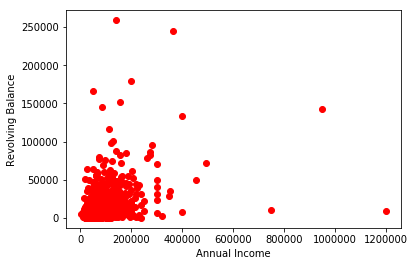

In [6]:
# plot 'annual_inc' dan 'revol_bal'
plt.plot(df_train['annual_inc'], df_train['revol_bal'], 'ro')
plt.xlabel('Annual Income')
plt.ylabel('Revolving Balance')

## Question 2: 
Berdasarkan kategori purpose (tujuan pinjaman) yang paling banyak ditemukan nasabah mengalami gagal bayar(not_paid=1), berapa banyak nasabah yang mengalami gagal bayar pada kategori tersebut? 

**Answer**: debt_consolidation -> 420

In [7]:
purpose_not_paid = []

for index, row in df_train.iterrows():
    if row['not_paid'] == 1:
        purpose_not_paid.append(row['purpose'])

In [8]:
from collections import Counter

Counter(purpose_not_paid)

Counter({'debt_consolidation': 420,
         'home_improvement': 58,
         'small_business': 15,
         'major_purchase': 22,
         'credit_card': 112})

(array([420.,   0.,  58.,   0.,   0.,  15.,   0.,  22.,   0., 112.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

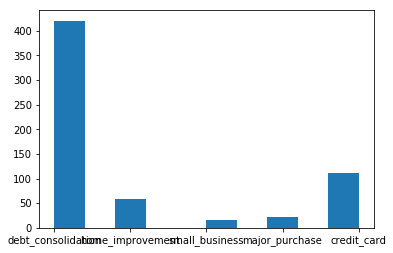

In [9]:
plt.hist(purpose_not_paid)

## Question 3: 
Apakah data loan (dataset 1) tersebut dikategorikan sebagai data yang akan mengalami masalah 'imbalanced class'? 

**Answer**: Tidak

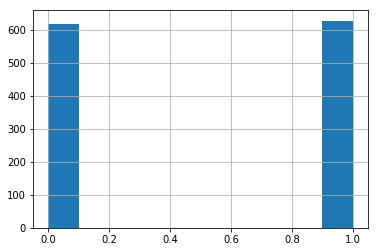

In [10]:
df_train['not_paid'].hist()

Menggunakan train dataset 1, buat sebuah model regresi logistik untuk memprediksi peluang default (not_paid) nasabah dengan variabel `purpose`, `int_rate`, `installment`, `annual_inc`, `verified`, `home_ownership` dan `grdCtoA` sebagai variabel prediktornya. 

## Question 4: 
Variabel manakah yang memiliki korelasi negatif terhadap kenaikan odds default (not_paid=1)?

**Answer**:

In [11]:
used_variables = ['purpose', 'int_rate', 'installment', 'annual_inc', 'verified', 'home_ownership', 'grdCtoA', 'not_paid']

nasabah = df_train[used_variables]

In [12]:
corr_matrix = nasabah.corr()
corr_matrix['not_paid'].sort_values(ascending=False)

not_paid       1.000000
int_rate       0.160727
installment    0.148875
verified       0.101174
annual_inc    -0.058832
grdCtoA       -0.153679
Name: not_paid, dtype: float64

# Preprocessing

In [13]:
nasabah.head()

,purpose,int_rate,installment,annual_inc,verified,home_ownership,grdCtoA,not_paid
0,debt_consolidation,21.45,955.75,90000.0,1,MORTGAGE,0,1
1,debt_consolidation,18.06,289.47,65000.0,1,MORTGAGE,0,1
2,home_improvement,9.44,838.91,97400.0,1,MORTGAGE,1,1
3,home_improvement,10.42,214.55,60000.0,0,OWN,1,0
4,debt_consolidation,11.99,1024.52,150000.0,0,MORTGAGE,1,0


In [14]:
# check missing values
nasabah.isnull().sum()

purpose           0
int_rate          0
installment       0
annual_inc        0
verified          0
home_ownership    0
grdCtoA           0
not_paid          0
dtype: int64

In [15]:
nasabah_num = nasabah.drop(['purpose', 'home_ownership'], axis=1)
nasabah_num.head()

,int_rate,installment,annual_inc,verified,grdCtoA,not_paid
0,21.45,955.75,90000.0,1,0,1
1,18.06,289.47,65000.0,1,0,1
2,9.44,838.91,97400.0,1,1,1
3,10.42,214.55,60000.0,0,1,0
4,11.99,1024.52,150000.0,0,1,0


In [16]:
nasabah_cat = nasabah[['purpose','home_ownership']]
nasabah_cat.head()

,purpose,home_ownership
0,debt_consolidation,MORTGAGE
1,debt_consolidation,MORTGAGE
2,home_improvement,MORTGAGE
3,home_improvement,OWN
4,debt_consolidation,MORTGAGE


In [17]:
nasabah_cat['purpose'].value_counts()

debt_consolidation    808
credit_card           247
home_improvement      126
major_purchase         40
small_business         23
Name: purpose, dtype: int64

In [18]:
nasabah_cat['home_ownership'].value_counts()

MORTGAGE    633
RENT        458
OWN         153
Name: home_ownership, dtype: int64

## Change categorical using One Hot Encoding

In [19]:
from future_encoders import OneHotEncoder

In [20]:
purpose_cat = nasabah_cat[['purpose']]
purpose_cat.head()

,purpose
0,debt_consolidation
1,debt_consolidation
2,home_improvement
3,home_improvement
4,debt_consolidation


In [21]:
encoder = OneHotEncoder(sparse=False)
purpose_cat_1hot = encoder.fit_transform(purpose_cat)
purpose_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [22]:
encoder.categories_

[array(['credit_card', 'debt_consolidation', 'home_improvement',
        'major_purchase', 'small_business'], dtype=object)]

## Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from future_encoders import OneHotEncoder, ColumnTransformer

In [24]:
num_attribs = ['int_rate', 'installment', 'annual_inc', 'verified', 'grdCtoA']
cat_attribs = ['purpose', 'home_ownership']

full_pipeline = ColumnTransformer([
    ("num", Imputer(strategy="median"), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

nasabah_prepared = full_pipeline.fit_transform(nasabah)

In [25]:
nasabah_prepared.shape

(1244, 13)

In [26]:
X_train = nasabah_prepared
y_train = nasabah['not_paid']

# Liniear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Test the model

In [28]:
df_test = pd.read_csv('dataset1/test1.csv')

In [29]:
df_test.head()

,Unnamed: 0,initial_list_status,purpose,int_rate,installment,annual_inc,dti,verification_status,grade,revol_bal,inq_last_12m,delinq_2yrs,home_ownership,not_paid,log_inc,verified,grdCtoA
0,6,w,debt_consolidation,10.91,130.79,49000.0,5.12,Not Verified,B,2016,5,0,MORTGAGE,1,10.799576,0,1
1,8,w,credit_card,10.91,915.50,95000.0,33.11,Not Verified,B,27588,1,0,RENT,1,11.461632,0,1
2,9,w,home_improvement,17.09,713.96,150000.0,14.26,Source Verified,D,27024,8,0,MORTGAGE,1,11.918391,1,0
3,10,w,debt_consolidation,18.06,408.73,85000.0,17.66,Verified,D,11719,1,0,RENT,0,11.350407,1,0
4,26,w,debt_consolidation,18.06,578.93,40000.0,25.32,Source Verified,D,15264,2,0,RENT,1,10.596635,1,0


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
Unnamed: 0             312 non-null int64
initial_list_status    312 non-null object
purpose                312 non-null object
int_rate               312 non-null float64
installment            312 non-null float64
annual_inc             312 non-null float64
dti                    312 non-null float64
verification_status    312 non-null object
grade                  312 non-null object
revol_bal              312 non-null int64
inq_last_12m           312 non-null int64
delinq_2yrs            312 non-null int64
home_ownership         312 non-null object
not_paid               312 non-null int64
log_inc                312 non-null float64
verified               312 non-null int64
grdCtoA                312 non-null int64
dtypes: float64(5), int64(7), object(5)
memory usage: 41.5+ KB


In [31]:
nasabah_test = df_test[used_variables]
nasabah_test.head()

,purpose,int_rate,installment,annual_inc,verified,home_ownership,grdCtoA,not_paid
0,debt_consolidation,10.91,130.79,49000.0,0,MORTGAGE,1,1
1,credit_card,10.91,915.50,95000.0,0,RENT,1,1
2,home_improvement,17.09,713.96,150000.0,1,MORTGAGE,0,1
3,debt_consolidation,18.06,408.73,85000.0,1,RENT,0,0
4,debt_consolidation,18.06,578.93,40000.0,1,RENT,0,1


In [32]:
X_test = full_pipeline.fit_transform(nasabah_test)

In [33]:
X_test.shape

(312, 13)

# Accuracy Score

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
y_true = nasabah_test['not_paid']

In [36]:
predict = np.rint(lin_reg.predict(X_test))

In [37]:
accuracy_score(y_true, predict)

0.6089743589743589

## Question 5: 
Jika pada model regresi logistik diperoleh koefisien dari variabel gradeCtoA adalah -0.3298. Dengan mengasumsikan variabel lain konstan, berapa odds default (not_paid=1) untuk nasabah yang memiliki grad A-C (gradeCtoA=1) dibandingkan dengan nasabah yang memiliki grade loan lain? bulatkan hasil anda hingga 3 angka dibelakang koma (contoh : 4.323 atau 16.423)

**Answer**:

In [38]:
pass

## Question 6
Diberikan cross tabulasi hasil perbandingan nilai aktual dan prediksi menggunakan model regresi logistik berikut :

|   |   |actual   |
|----|:-:|:-:|---|---|
|   |   | 0  | 1  |   |
| predicted  | 0  | 93  | 54  |   |
|   | 1  | 68  | 97  |   |

Berapa nilai recall/sensitivity berdasarkan confusion matrix diatas?

**Answer**: 0.6423841059602649

In [39]:
recall = 97/(97+54)
recall

0.6423841059602649